In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = x_1 + e
    return y, x_1, x_2

In [3]:
# Setup test
def setup_test_params(y, x_1, x_2):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    return ols, ridge, lasso 

In [4]:
# Scatterplots
def params_scatterplot(x):
    for model in list(setup_test_params(y, x_1, x_2)):
        plt.scatter(range(len(model.params)), model.params)
        plt.legend(['ols', 'ridge', 'lasso'])

In [5]:
# MSE
def setup_test_mse(y, x_1, x_2, k):
    y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
    lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
    ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
    return ols_mse, lasso_mse, ridge_mse

In [6]:
# Calculate MSEs
def mse(lst):
    df = pd.DataFrame(lst, columns=['ols_mse', 'lasso_mse', 'ridge_mse'])
    df['diff_ols_lasso'] = df['ols_mse'] - df['lasso_mse']
    df['diff_ols_ridge'] = df['ols_mse'] - df['ridge_mse']
    df['diff_lasso_ridge'] = df['ridge_mse'] - df['lasso_mse']
    lst_cols = ['diff_ols_lasso','diff_ols_ridge','diff_lasso_ridge']
    for i in lst_cols:
        sd = df[i].std()
        df[i] = -1*df[i]/sd * math.sqrt(1000)
    plt.hist(df['diff_ols_lasso'],label='diff_ols_lasso')
    plt.hist(df['diff_ols_ridge'],label='diff_ols_ridge')
    plt.hist(df['diff_lasso_ridge'],label='diff_lasso_ridge')
    plt.legend()
    plt.show()

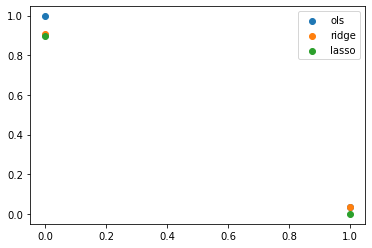

In [7]:
# num_cov = 1
k = 1
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

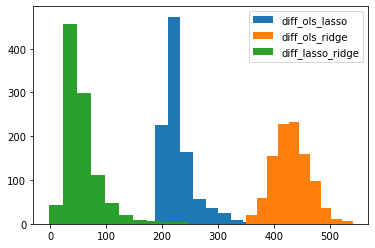

In [8]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)

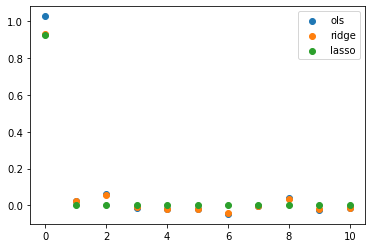

In [9]:
# num_cov = 10
k = 10
y, x_1, x_2 = gen_data(nobs=1000, num_cov=k)
x = setup_test_params(y, x_1, x_2)
params_scatterplot(x)

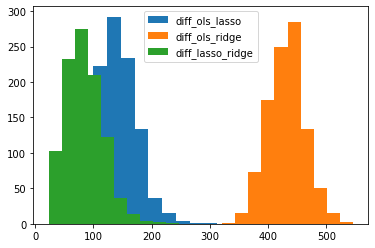

In [10]:
lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2, k)
    lst.append(results)
mse(lst)

In [11]:
# 4 * f = 24 figures - 
# vary x, n, beta = differences and no differences: ols/ridge/lasso in three different graphs: ols < lasso < ridge

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [12]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
    if model == 1:
        return ols
    elif model == 2:
        return lasso
    elif model == 3:
        return ridge

# MSE
def setup_test_mse(y, x_1, x_2, n, k, a, m, model):
    y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
    lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
    ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
    if model == 1:
        return ols_mse
    elif model == 2:
        return lasso_mse
    elif model == 3:
        return ridge_mse
    elif model == 4:
        return ols_mse, lasso_mse
    elif model == 5:
        return ols_mse, ridge_mse
    elif model == 6:
        return lasso_mse, ridge_mse

# Calculate MSEs
def mse(lst, n, i, model):
    if model == 1 or model == 2 or model == 3:
        lst_cols = ['mse_' + str(i)]
        df = pd.DataFrame(lst, columns=lst_cols)
        for j in lst_cols:
            sd = df[j].std()
            df[j] = -1*df[j]/sd * math.sqrt(n)
        plt.hist(df['mse_'+str(i)], label='mse_'+str(i))
        plt.legend()
        plt.show()
    else:
        lst_cols = ['1','2']
        df = pd.DataFrame(lst, columns=lst_cols)
        df['diff'] = df['1'] - df['2']
        for i in lst_cols:
            sd = df[i].std()
            df[i] = -1*df[i]/sd * math.sqrt(n)
        plt.hist(df['diff'],label='diff')
        plt.legend()
        plt.show()

### Varying values

In [13]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        y, x_1, x_2 = gen_data(nobs=i, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(i):
            results = setup_test_mse(y, x_1, x_2, i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    return output

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=m)
        x = setup_test_params(y, x_1, x_2, i, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, k, j, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    return output

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, i, j, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    return output

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        y, x_1, x_2 = gen_data(nobs=n, num_cov=k, m=i)
        x = setup_test_params(y, x_1, x_2, a, model)
        lst = []
        for j in range(1000):
            results = setup_test_mse(y, x_1, x_2, n, k, j, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    return output

Vary Observations


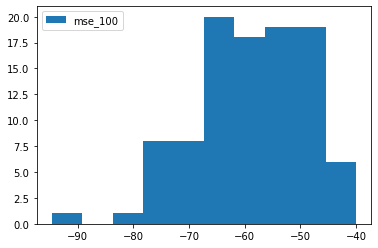

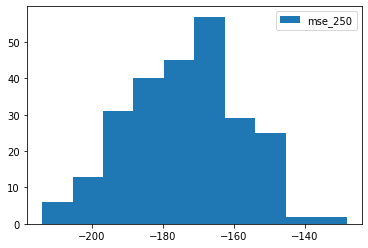

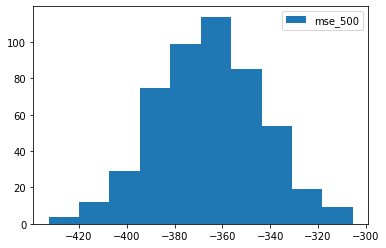

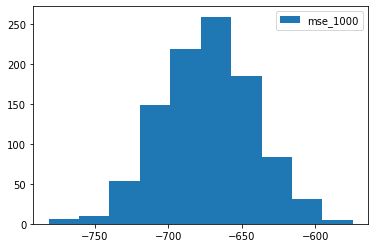

Vary Alpha Levels


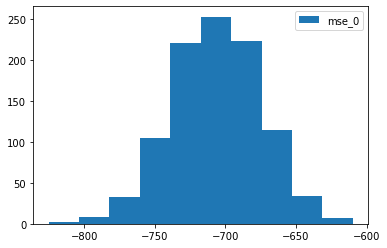

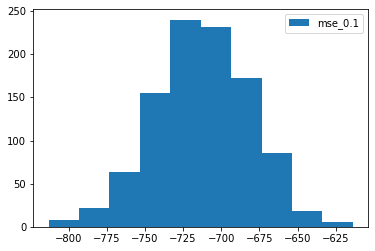

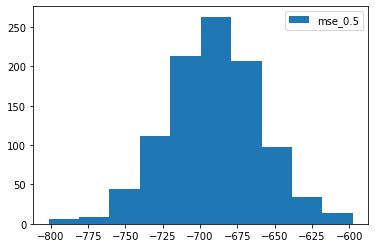

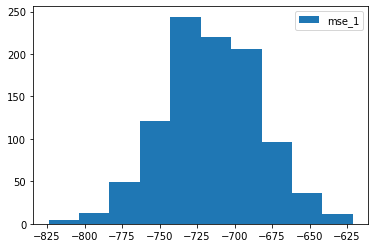

Vary X Variables


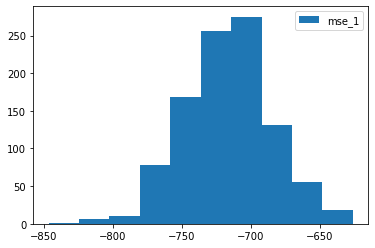

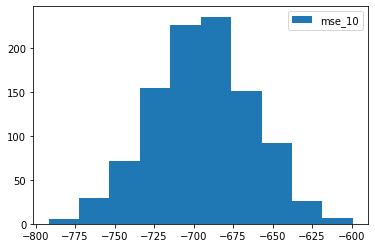

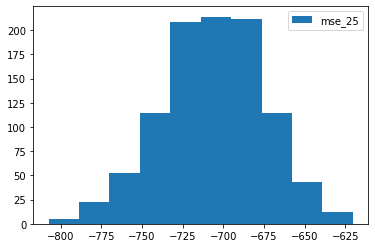

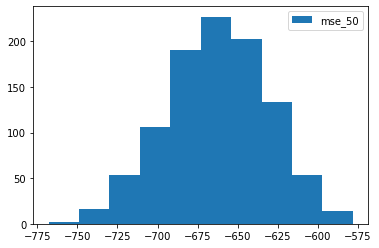

Vary Multiplicative Factors


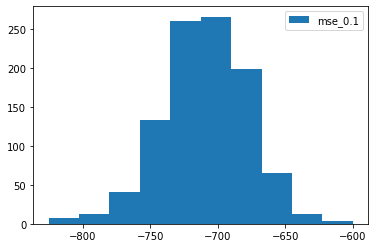

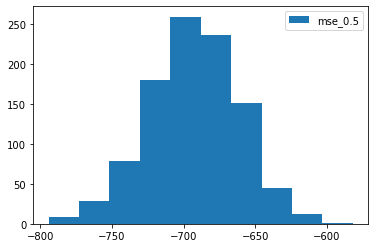

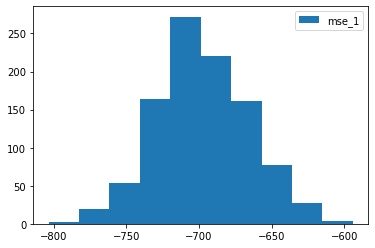

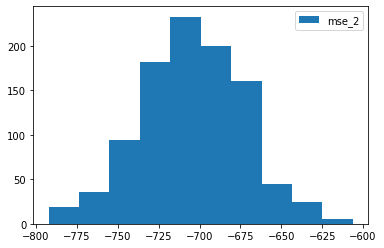

In [15]:
# Model = 1 is OLS
print('Vary Observations')
vary_obs(1)
print('Vary Alpha Levels')
vary_alpha(1)
print('Vary X Variables')
vary_xvars(1)
print('Vary Multiplicative Factors')
vary_multiply(1)

Vary Observations


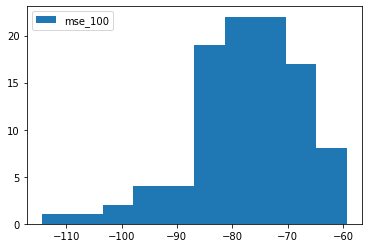

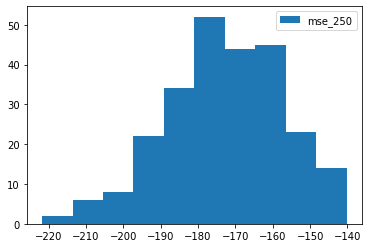

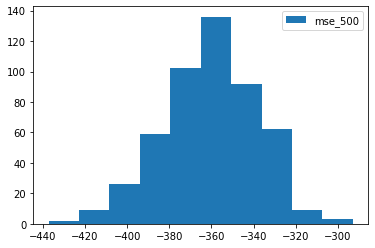

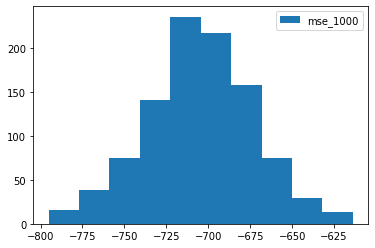

Vary Alpha Levels


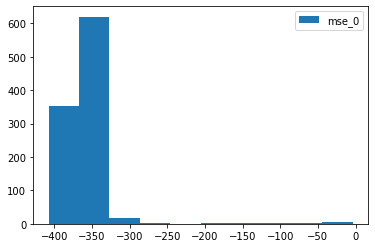

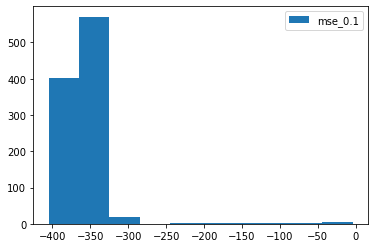

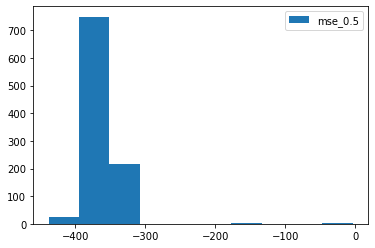

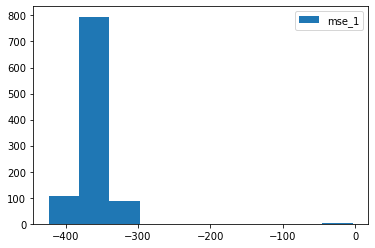

Vary X Variables


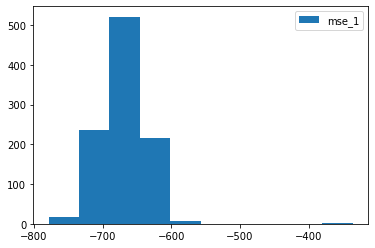

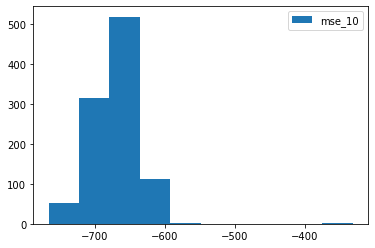

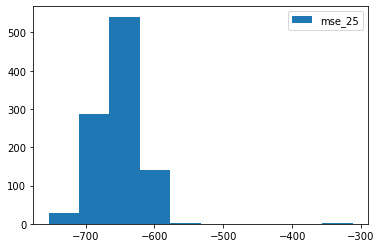

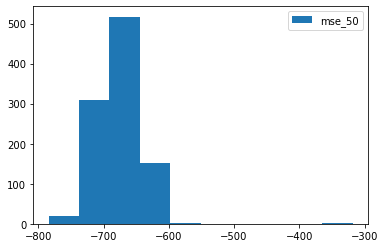

Vary Multiplicative Factors


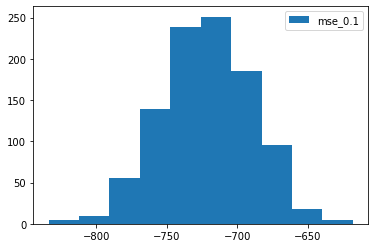

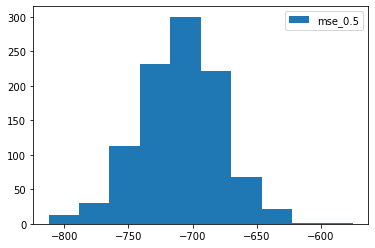

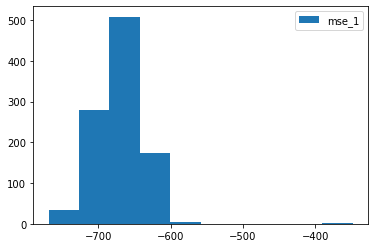

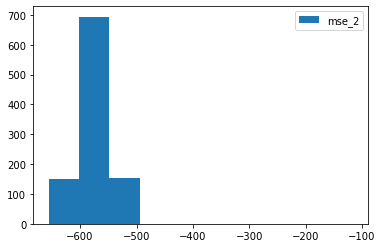

In [16]:
# Model = 2 is Lasso
print('Vary Observations')
vary_obs(2)
print('Vary Alpha Levels')
vary_alpha(2)
print('Vary X Variables')
vary_xvars(2)
print('Vary Multiplicative Factors')
vary_multiply(2)

Vary Observations


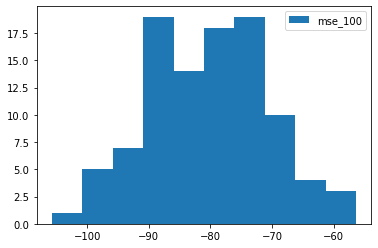

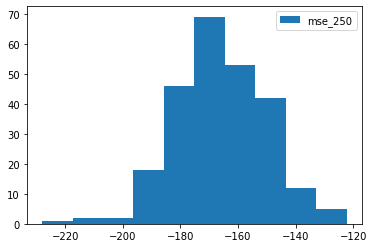

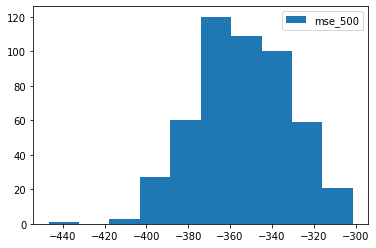

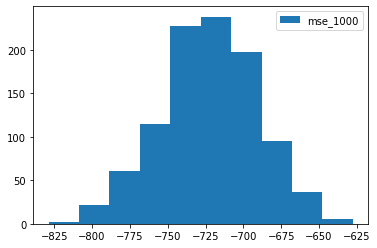

Vary Alpha Levels


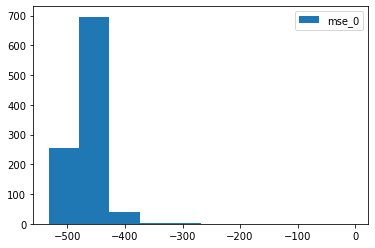

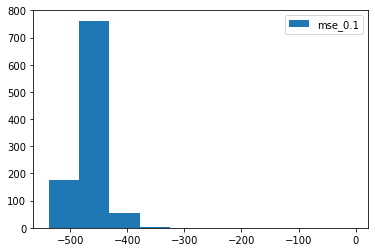

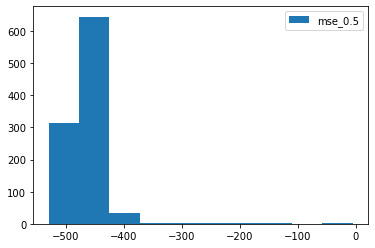

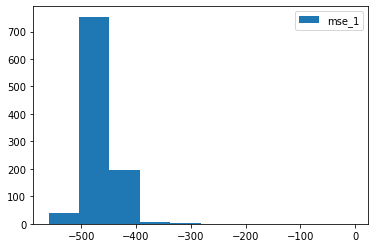

Vary X Variables


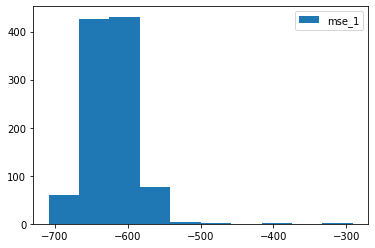

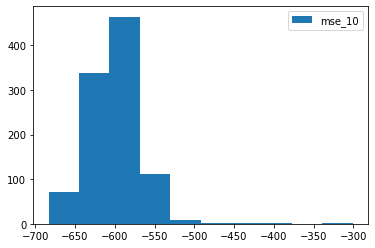

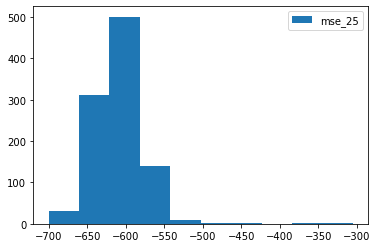

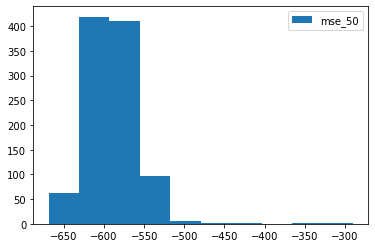

Vary Multiplicative Factors


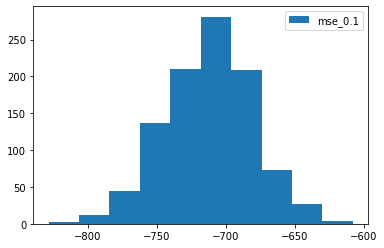

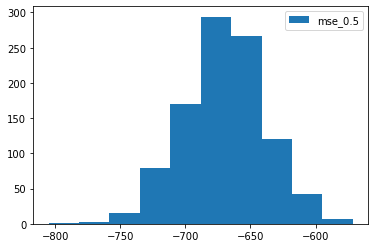

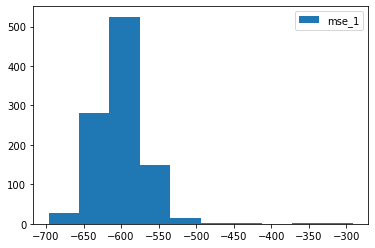

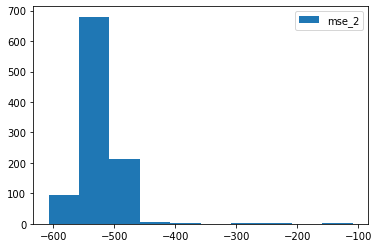

In [17]:
# Model = 3 is Ridge
print('Vary Observations')
vary_obs(3)
print('Vary Alpha Levels')
vary_alpha(3)
print('Vary X Variables')
vary_xvars(3)
print('Vary Multiplicative Factors')
vary_multiply(3)

Vary Observations


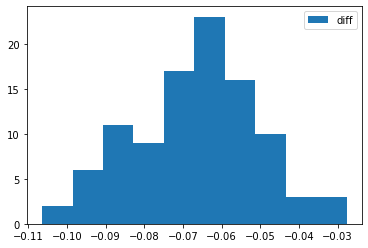

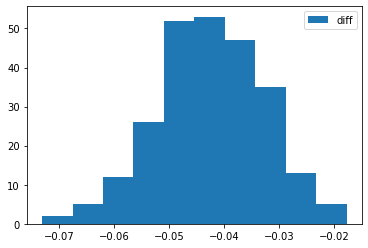

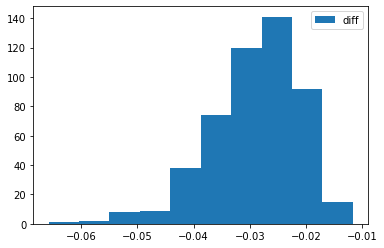

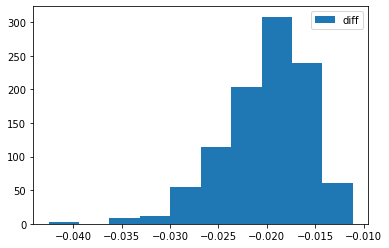

Vary Alpha Levels


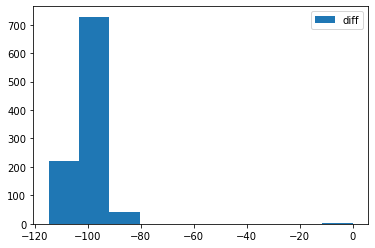

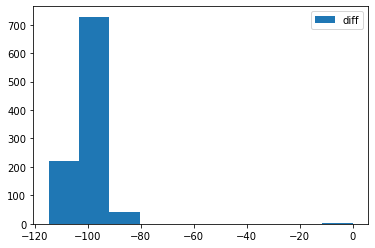

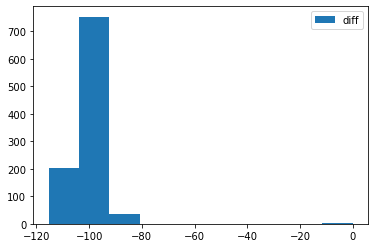

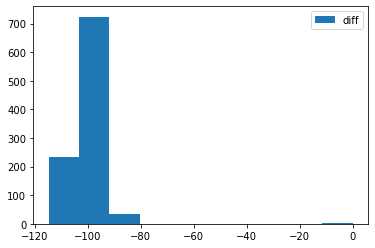

Vary X Variables


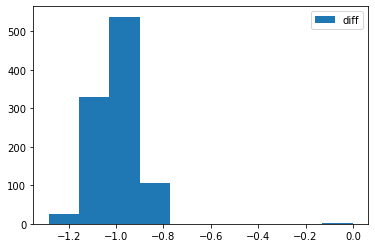

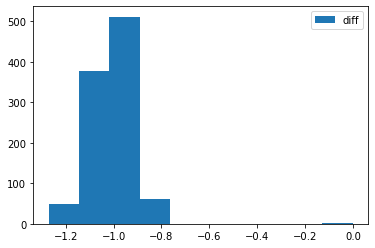

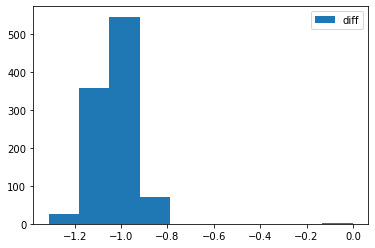

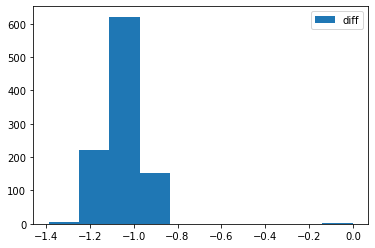

Vary Multiplicative Factors


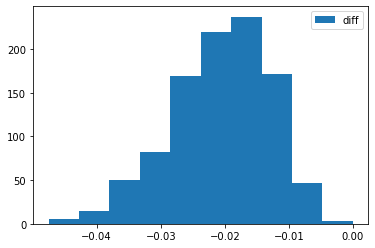

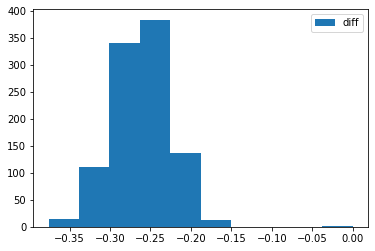

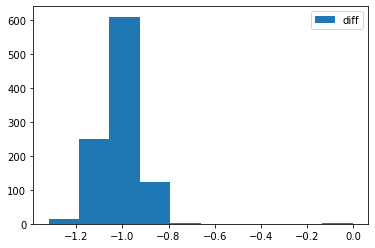

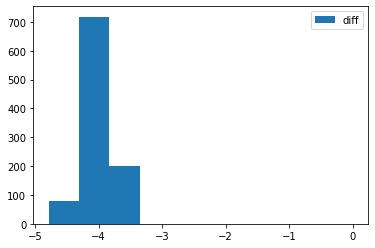

In [18]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary X Variables')
vary_xvars(4)
print('Vary Multiplicative Factors')
vary_multiply(4)

Vary Observations


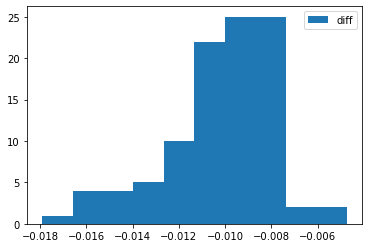

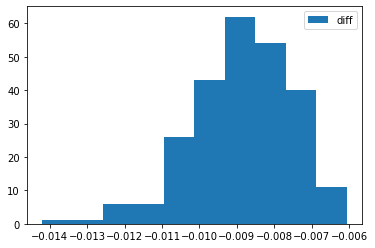

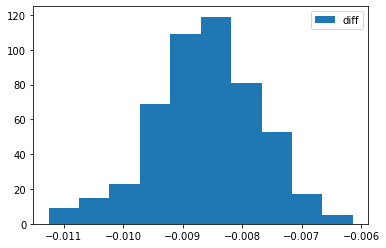

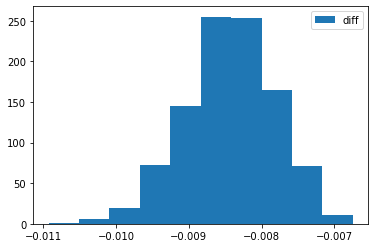

Vary Alpha Levels


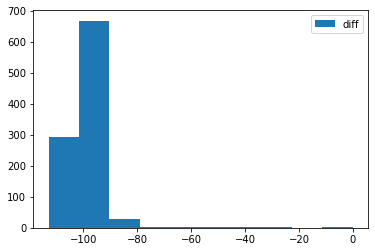

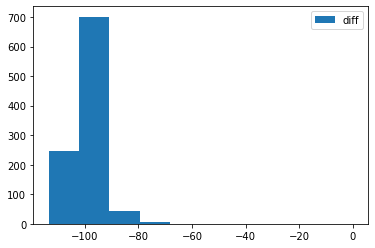

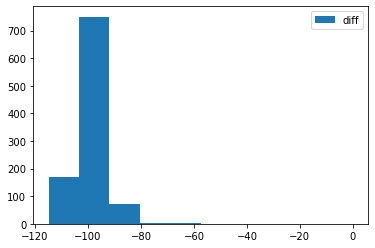

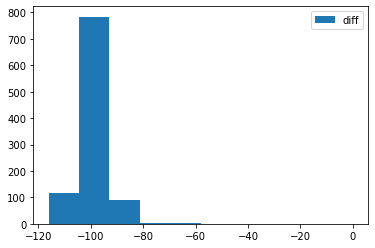

Vary X Variables


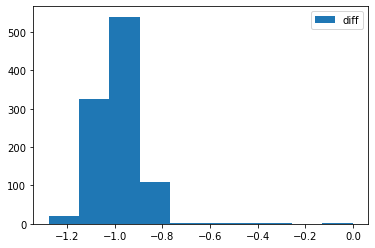

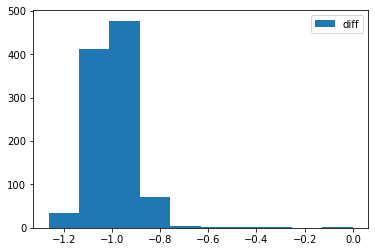

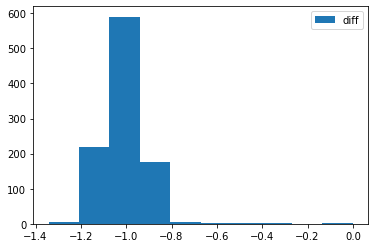

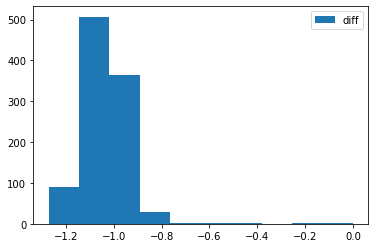

Vary Multiplicative Factors


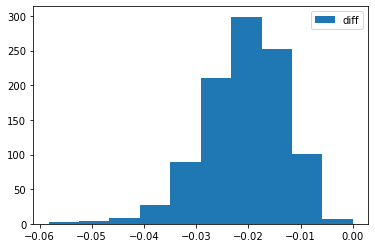

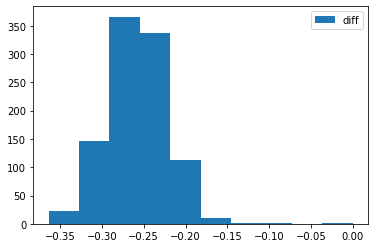

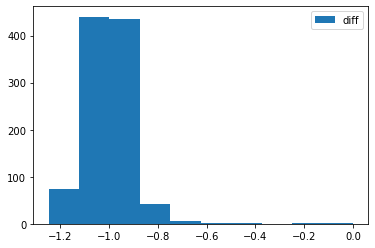

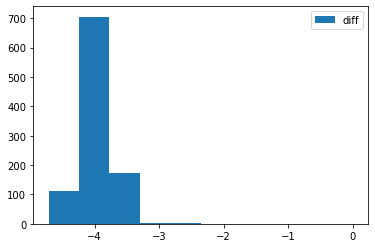

In [19]:
# Model = 5 is OlS - Lasso
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary X Variables')
vary_xvars(5)
print('Vary Multiplicative Factors')
vary_multiply(5)

Vary Observations


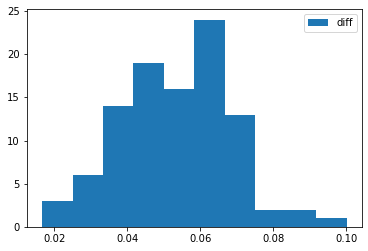

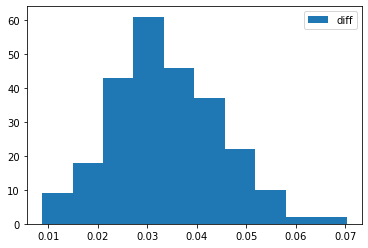

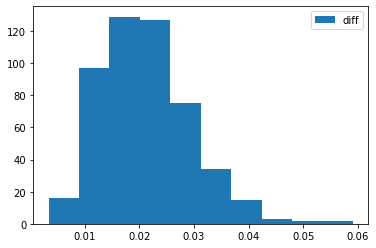

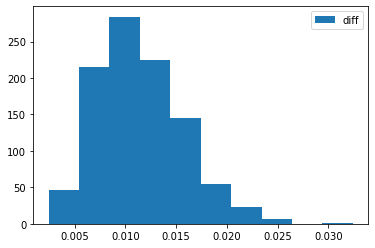

Vary Alpha Levels


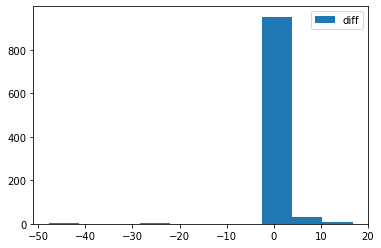

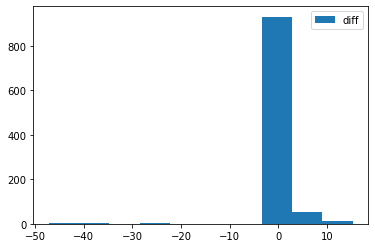

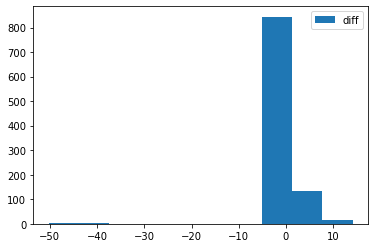

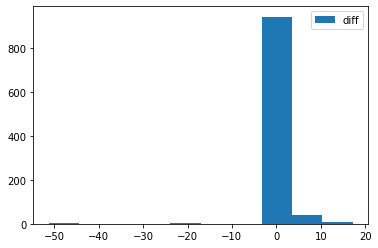

Vary X Variables


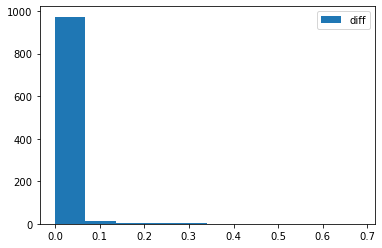

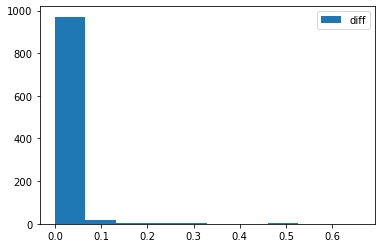

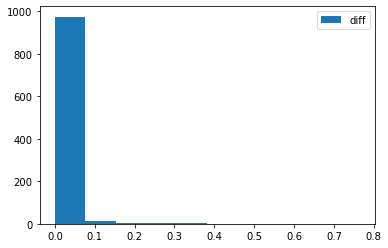

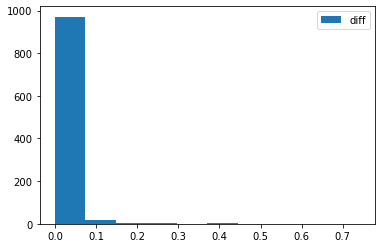

Vary Multiplicative Factors


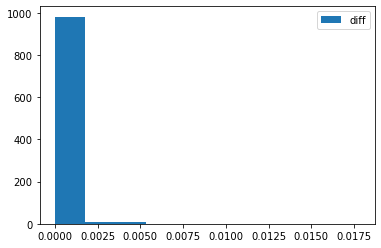

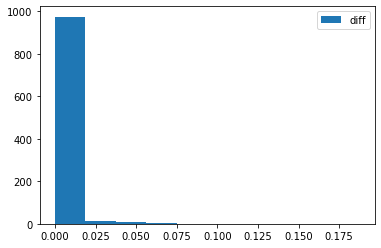

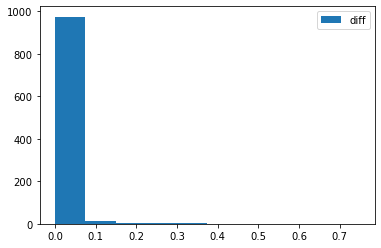

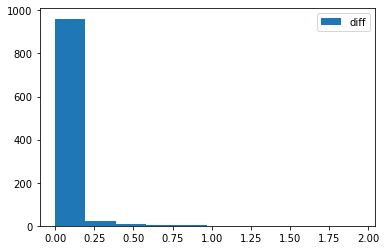

In [20]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary X Variables')
vary_xvars(6)
print('Vary Multiplicative Factors')
vary_multiply(6)